Nome: Adriano Ulrich do Prado Wiedmann

---

Matrícula: 202014824

In [2564]:
# allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2565]:
import sys

sys.path.append('/content/drive/MyDrive/DP4')

In [2566]:
# Importing mathematical and scientific libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Importing specific optimization and special calculation functions
from scipy.optimize import minimize
from scipy.special import erfc, erfcinv
from scipy.integrate import quad

# Importing classes and functions related to PyTorch for data manipulation
from torch.utils.data import Dataset, DataLoader
import torch
from torch.utils.data import Dataset, TensorDataset

# Importing the torchvision library for computer vision tasks
import torchvision
import torchvision.transforms as transforms

# Importing Pandas for tabular data manipulation
import pandas as pd

import os
# used for manipulating directory paths

In [2567]:
train_on_gpu = torch.cuda.is_available() # Check if the GPU is available
if train_on_gpu:
    device = torch.device('cuda') # Select device as GPU
    print("Treinando na GPU.")
else:
    device = torch.device('cpu') # Select device as CPU
    print("GPU indisponível, treinando na CPU.")

GPU indisponível, treinando na CPU.


In [2568]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2569]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        # The super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class.
        super().__init__()
        # Our layers
        # ====================== YOUR CODE HERE ======================
        # Classe nn.linear para aplicar as transformações lineares
        self.fc1 = torch.nn.Linear(13, 200, bias=True)
        self.fc2 = torch.nn.Linear(200, 200, bias=True)
        self.fc3 = torch.nn.Linear(200, 2, bias=True)
        # ============================================================

    def forward(self, out):
        # foward() will perform linear activation on each layer
        # ====================== YOUR CODE HERE ======================
        #Com torch.relu é possível utilizar a funçãod e ativação ReLU
        out = self.fc1(out)
        out = torch.relu(self.fc2(out))
        out = torch.relu(self.fc3(out))
        # ============================================================

        return out

In [2570]:
#df = pd.read_csv(os.path.join("/dataset", "rssi-dataset.csv"))
df = pd.read_csv(os.path.join("/content/drive/MyDrive/DP4/dataset", "rssi-dataset.csv"))
df = df.iloc[:,1:]
df = df.sample(frac=1)

In [2571]:
df.head()

,X,Y,2c5741f10e01,2c5741f11ca1,2c5741f11aa1,2c5741f0eb61,2c5741f29ee1,2c5741f5f381,2c5741f58c61,2c5741f0ee81,2c5741f0e341,2c5741f5d861,2c5741f5de21,2c5741f0fa61,2c5741f0ec01
126,156.630000,59.798286,-100,-100,-100,-100,-62,-100,-70,-32,-74,-100,-100,-100,-100
238,204.040571,70.110571,-61,-32,-73,-100,-100,-100,-100,-100,-100,-100,-100,-73,-100
392,150.144286,57.398571,-100,-100,-100,-100,-100,-100,-33,-60,-100,-100,-100,-100,-100
499,204.040571,70.110571,-61,-32,-79,-100,-100,-100,-100,-100,-100,-100,-100,-73,-76
317,205.078286,59.863143,-73,-58,-100,-100,-100,-100,-100,-100,-100,-100,-100,-64,-61


In [2572]:
# Proporção de dados para teste, em %
test_proportion = 15

In [2573]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))

def min_max_scaler(input):
    # ====================== YOUR CODE HERE ======================

    # The 'min_max_scaler' function takes an input dataset 'input'.

    # Perform Min-Max normalization on the input data 'input'.
    # This scales the values of the data to a range between 0 and 1 while preserving their relationships.

    # The function returns the normalized array

    # Note: There are already libraries with the implementation of this function
    # ============================================================

    # Será utilizado MinMaxScaler do scikit-learn
    #scaler = MinMaxScaler(feature_range=(0, 1))

    # Para realizar o ajuste e a transformação, será usado fit_transform
    dataNormalized = scaler.fit_transform(input)

    return dataNormalized

    # ============================================================

In [2574]:
# Determining the number of test samples based on a given test proportion
test_num = int(test_proportion / 100 * len(df))

# Splitting input and output data into training and testing sets
# Converting the data to float32 data type
input_train, input_test = df.iloc[:-test_num, 2:].astype(np.float32).values, df.iloc[-test_num:, 2:].astype(np.float32).values
output_train, output_test = df.iloc[:-test_num, 0:2].astype(np.float32).values, df.iloc[-test_num:, 0:2].astype(np.float32).values

# Scaling the input data using a scaler (Min-Max)
input_train = min_max_scaler(input_train)
input_test = min_max_scaler(input_test)

# Converting the scaled data into PyTorch tensors
input_train, input_test = torch.Tensor(input_train), torch.Tensor(input_test)
output_train, output_test = torch.Tensor(output_train), torch.Tensor(output_test)

In [2575]:
# Batch Size
batch_size = 32

# Creating datasets using the input and output tensors
dataset_train = TensorDataset(input_train, output_train)  # Training dataset
dataset_valid = TensorDataset(input_test, output_test)    # Validation dataset

# Creating data loaders for training and testing with specified batch sizes
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)  # Training data loader
dataloader_test = DataLoader(dataset_valid, batch_size=test_num, shuffle=True)     # Testing data loader

In [2576]:
# Instantiate the NN into variable model
model = NeuralNetwork()

# Definition of cost function
criterion = torch.nn.MSELoss()

# Definition of ADAM as optimizer algorithm and its parameter sets
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=0.00001)

In [2577]:
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=13, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=2, bias=True)
)


In [2578]:
# number of epochs to train the model
epochs = 500

train_losses, valid_losses = [], []

for e in range(epochs):

    correct,total = 0,0
    train_loss,valid_loss = 0,0

    ###################
    # train the model #
    ###################
    model.train()  # prep model for training
    for RSSI, position in dataloader_train:
        # ====================== YOUR CODE HERE ======================
        # Implement the forward pass of your model:
        # - Pass the input data (RSSI values) through your neural network model to compute predicted positions.
        # - Calculate the loss between the predicted positions (output) and the actual positions.
        # - Perform backward pass to compute gradients.
        # - Update model parameters using the optimizer.
        # - Update running training loss (variable must have the name train_loss)
        # ============================================================

        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(RSSI)
        # calculate the loss
        loss = criterion(output, position)
        # backward pass: compute gradient of the loss with respect to model parameters)
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()

        # ============================================================

    ######################
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for RSSI, position in dataloader_test:
        # ====================== YOUR CODE HERE ======================
        # Implement the evaluation step:
        # - Pass the input data (RSSI values) through the trained model to compute predicted positions.
        # - Calculate the loss between the predicted positions (output) and the actual positions for validation.
        # - Update the running validation loss (variable must have the name valid_loss).
        # ============================================================

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(RSSI)
        # calculate the loss
        loss = criterion(output, position)
        # update running validation loss
        valid_loss += loss.item()
        torch.save(model.state_dict(), 'model')

        # ============================================================

    else:
        train_loss = train_loss/len(dataloader_train)
        valid_loss = valid_loss/len(dataloader_test)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        if e%5 == 0:
          print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
          e+1,
          train_loss,
          valid_loss
          ))


Epoch: 1 	Training Loss: 17976.749023 	Validation Loss: 17531.023438
Epoch: 6 	Training Loss: 368.547982 	Validation Loss: 227.198395
Epoch: 11 	Training Loss: 212.793453 	Validation Loss: 171.784180
Epoch: 16 	Training Loss: 150.912706 	Validation Loss: 136.153610
Epoch: 21 	Training Loss: 102.596703 	Validation Loss: 100.503990
Epoch: 26 	Training Loss: 67.647246 	Validation Loss: 67.871178
Epoch: 31 	Training Loss: 41.777239 	Validation Loss: 42.818623
Epoch: 36 	Training Loss: 29.095904 	Validation Loss: 28.512407
Epoch: 41 	Training Loss: 23.822072 	Validation Loss: 21.523952
Epoch: 46 	Training Loss: 20.969707 	Validation Loss: 17.743660
Epoch: 51 	Training Loss: 19.253113 	Validation Loss: 16.017782
Epoch: 56 	Training Loss: 18.610005 	Validation Loss: 14.471888
Epoch: 61 	Training Loss: 17.873057 	Validation Loss: 13.822944
Epoch: 66 	Training Loss: 17.579405 	Validation Loss: 13.027847
Epoch: 71 	Training Loss: 17.212454 	Validation Loss: 13.981009
Epoch: 76 	Training Loss: 17

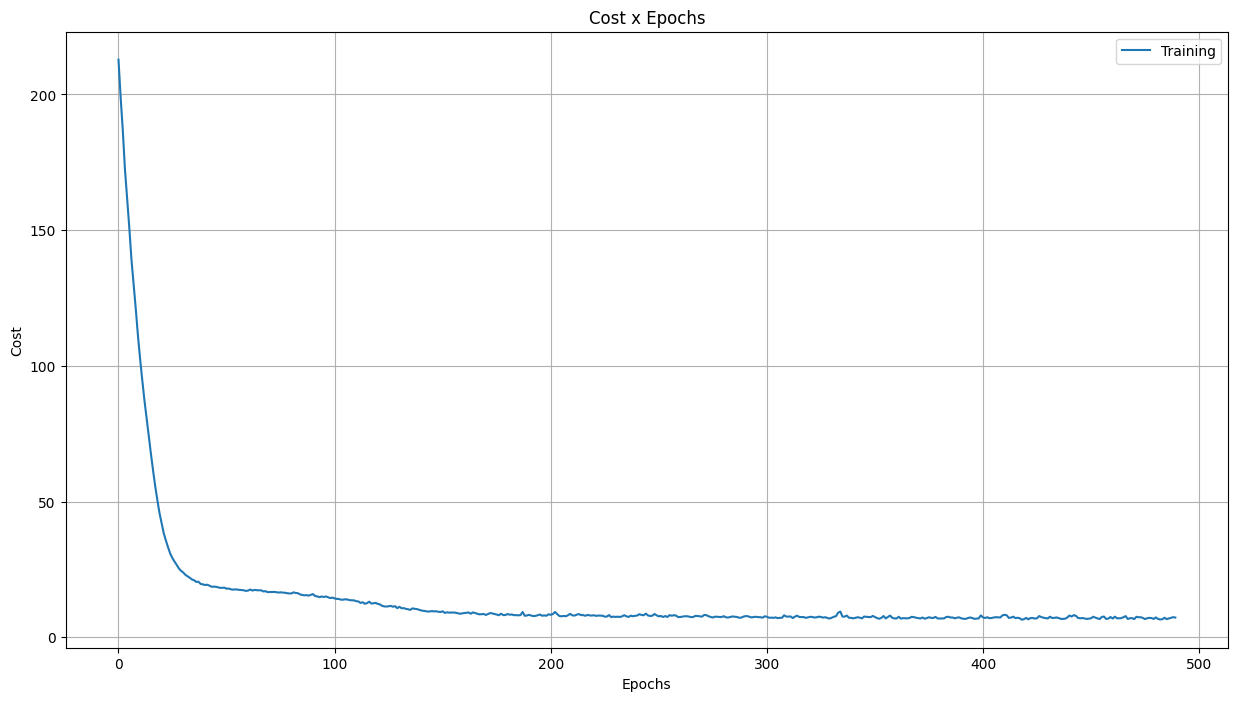

In [2579]:
plt.figure(figsize=(15,8))
plt.plot(train_losses[10:], label='Training')
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

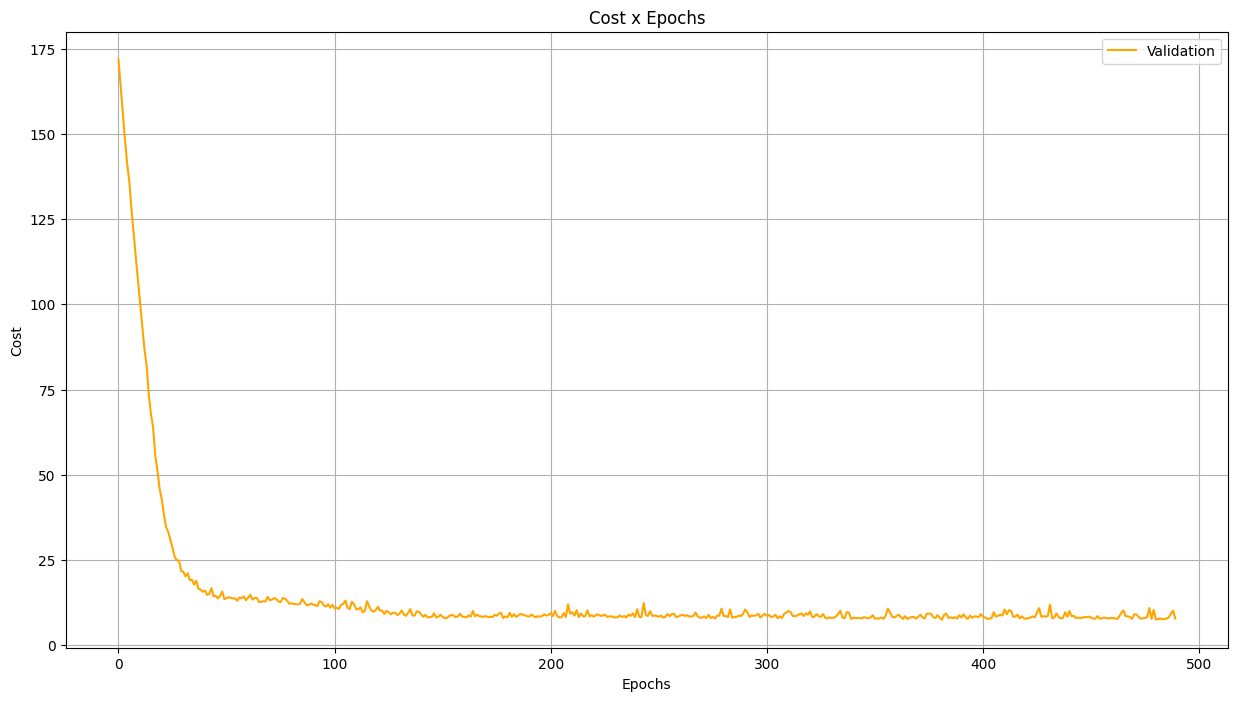

In [2580]:
plt.figure(figsize=(15,8))
plt.plot(valid_losses[10:], label='Validation', color='orange')
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

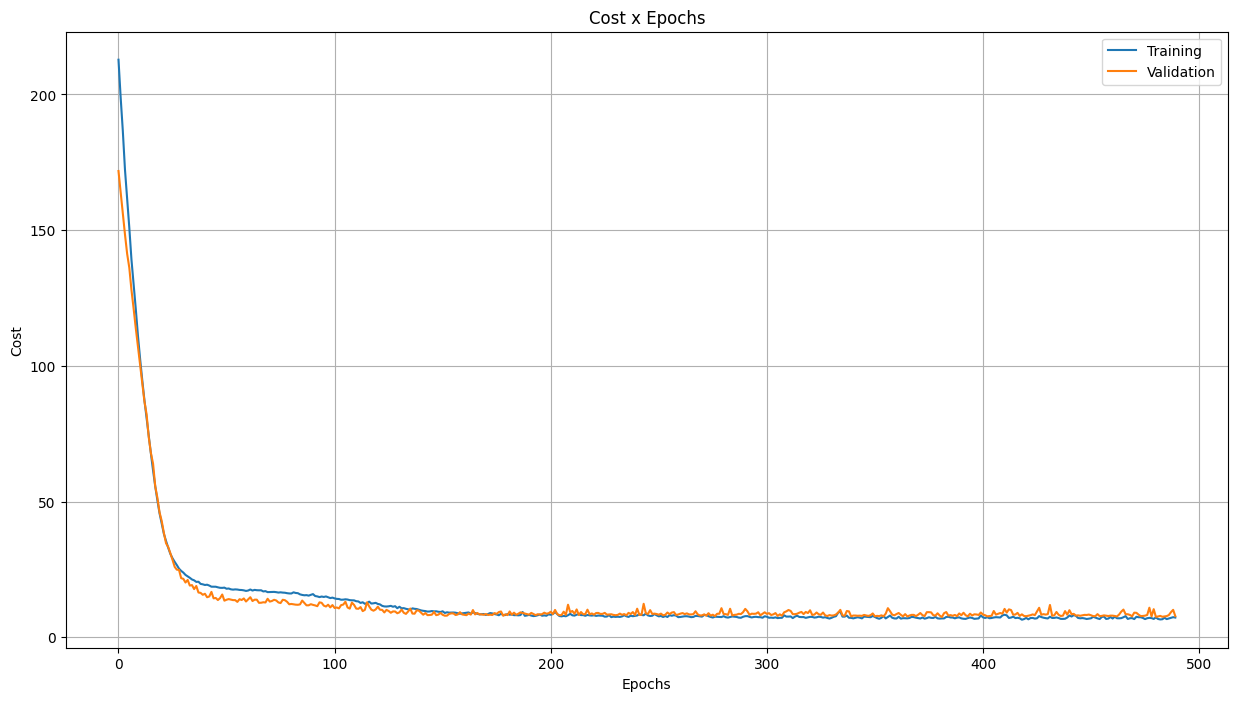

In [2581]:
plt.figure(figsize=(15,8))
plt.plot(train_losses[10:],label='Training')
plt.plot(valid_losses[10:], label='Validation')
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

In [2582]:
# ====================== YOUR CODE HERE ======================
# Instantiate the neural network model into a variable named model_teste
# Load a pre-trained model from a file named 'model'
# Prepare the model for evaluation mode (turn off dropout, etc.)
# Create an empty list to store the model's output

# Instantiate the NN into variable model_teste
model_teste = NeuralNetwork()

# Load a pre-trained model from a file named 'model'
model_teste.load_state_dict(torch.load('model', map_location=torch.device('cpu')))

# Prepare the model for evaluation mode (turn off dropout, etc.)
model_teste.eval()

# Create an empty list to store the model's output
output_teste = []
# ============================================================

# Iterate through the test dataloader, which provides RSSI data and positions
for RSSI, positions in dataloader_test:
    # ====================== YOUR CODE HERE ======================
    # Use the pre-trained model (model_teste) to make predictions based on RSSI data (RSSI).
    # Append the model's predictions to the 'output_teste' list.
    # ============================================================
    # Use the pre-trained model to make predictions based on RSSI data

    # Use the pre-trained model to make predictions based on RSSI data

    with torch.no_grad():
      output_teste.extend(model(RSSI))

    output_teste = torch.stack((output_teste), dim=0)
    # ============================================================

In [2583]:
from sklearn.metrics import mean_squared_error

RMSE_x = mean_squared_error(output_teste[:,0].tolist(), positions[:,0].tolist(), squared=False)
RMSE_y = mean_squared_error(output_teste[:,1].tolist(), positions[:,1].tolist(), squared=False)

In [2584]:
print('Erro Quadrático Médio (RMSE) Eixo X: {:.6f} \nErro Quadrático Médio (RMSE) Eixo Y: {:.6f}'.format(
      RMSE_x,
      RMSE_y))

Erro Quadrático Médio (RMSE) Eixo X: 3.186133 
Erro Quadrático Médio (RMSE) Eixo Y: 2.324475


In [2585]:
# Import math Library
import math

print('Erro Quadrático Médio (RMSE): {:.6f}'.format(
      math.sqrt(RMSE_x**2 + RMSE_y**2)))

Erro Quadrático Médio (RMSE): 3.943936


In [2586]:
erros = []
for i in range(len(output_teste[:, 0].tolist())):
    x = output_teste[:, 0].tolist()[i] - positions[:, 0].tolist()[i]
    y = output_teste[:, 1].tolist()[i] - positions[:, 1].tolist()[i]
    erro = math.sqrt(x**2 + y**2)
    erros.append(erro)

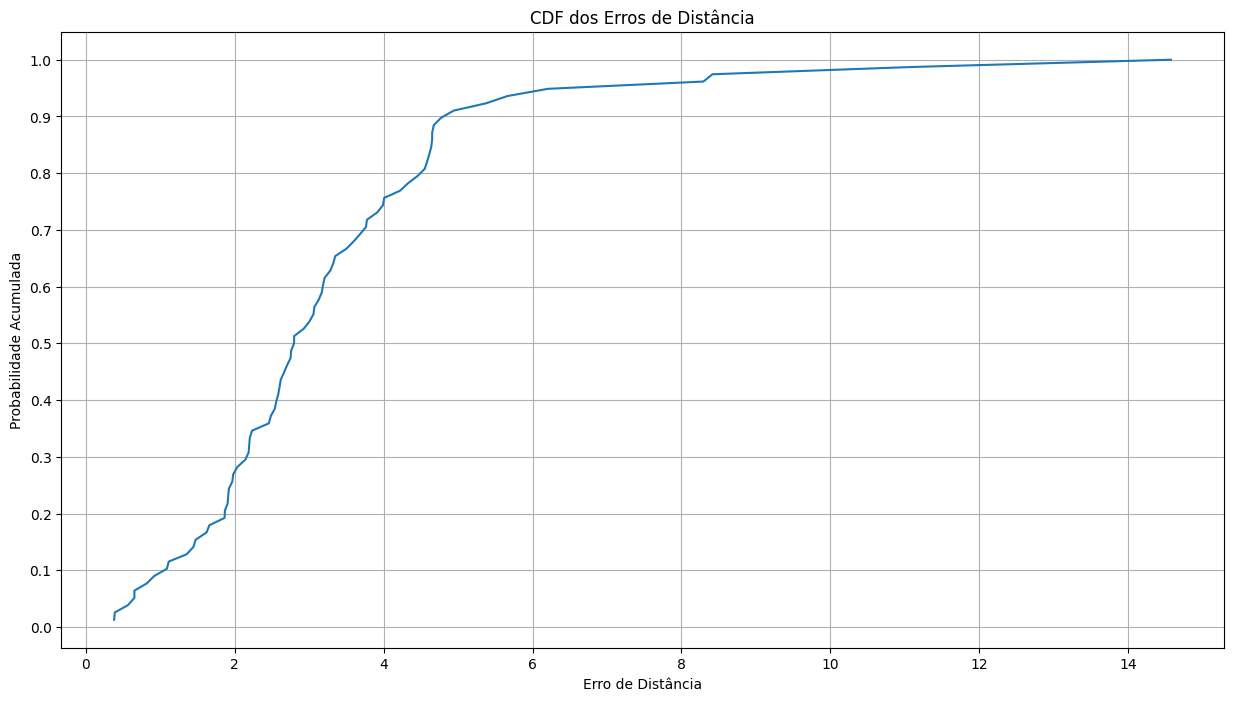

In [2587]:
# Classify errors
erros_ordenados = np.sort(erros)

# calculate the CDF
cdf = np.arange(1, len(erros_ordenados) + 1) / len(erros_ordenados)

# Plot the CDF with a solid line
plt.figure(figsize=(15,8))
plt.plot(erros_ordenados, cdf)
plt.xlabel('Erro de Distância')
plt.ylabel('Probabilidade Acumulada')
plt.title('CDF dos Erros de Distância')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()